### IMPORT REQUIRED LIBRARIES

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import np_utils

### LOADING AND SPLITTING THE DATA

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [3]:
print("Shape of Training Images : {}".format(x_train.shape))
print("Shape of Testing Images  : {}".format(x_test.shape))

Shape of Training Images : (50000, 32, 32, 3)
Shape of Testing Images  : (10000, 32, 32, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

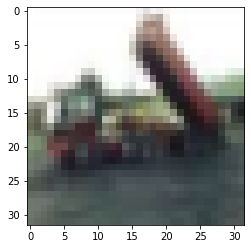

In [4]:
img=x_train[2]
plt.imshow(img)
plt.show

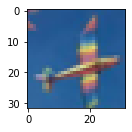

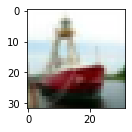

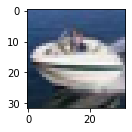

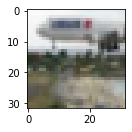

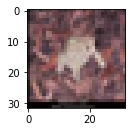

In [5]:
for i in range(220,225):
    plt.subplot(2,3,6)
    plt.imshow(x_train[i])
    plt.show()


### PREPROCESSING OF DATA 

In [6]:
x_train.shape[0]

50000

In [7]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train /=255
x_test /=255
n_classes=10


print("Shape before one hot encoding : ",y_train.shape)

Y_train = np_utils.to_categorical(y_train,n_classes)
Y_test = np_utils.to_categorical(y_test,n_classes)

print("Shape after encoding : ",Y_train.shape)

Shape before one hot encoding :  (50000, 1)
Shape after encoding :  (50000, 10)


### BUILDING THE MODEL

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Dense,Flatten

model=Sequential()

#Convolutional Layear 1

model.add(Conv2D(50, kernel_size=(3,3),padding="same",strides=(1,1),activation="relu",input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Convolutional Layear 2

model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Convolutional Layear 3

model.add(Conv2D(125,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Convolutional Layear 4

model.add(Conv2D(225,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Flatten Layear

model.add(Flatten())

# Hidden Layer 1

model.add(Dense(500,activation='relu'))
model.add(Dropout(0.3))

# Hidden Layer 2

model.add(Dense(250,activation='relu'))
model.add(Dropout(0.4))

#Output Layer

model.add(Dense(10,activation='softmax'))

# Compiling the model

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics="accuracy")


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 50)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 50)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 75)        33825     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 75)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 75)          0

### Training the model

In [10]:
model.fit(x_train,Y_train,batch_size=128,epochs=20,validation_data=(x_test,Y_test))

Epoch 1/20
391/391 [==============================] - 105s 266ms/step - loss: 1.7884 - accuracy: 0.3260 - val_loss: 1.4557 - val_accuracy: 0.4506
Epoch 2/20
391/391 [==============================] - 107s 274ms/step - loss: 1.3141 - accuracy: 0.5218 - val_loss: 1.1066 - val_accuracy: 0.6075
Epoch 3/20
391/391 [==============================] - 94s 241ms/step - loss: 1.1193 - accuracy: 0.6031 - val_loss: 0.9856 - val_accuracy: 0.6575
Epoch 4/20
391/391 [==============================] - 84s 215ms/step - loss: 0.9877 - accuracy: 0.6520 - val_loss: 0.9210 - val_accuracy: 0.6788
Epoch 5/20
391/391 [==============================] - 87s 224ms/step - loss: 0.9065 - accuracy: 0.6841 - val_loss: 0.8231 - val_accuracy: 0.7096
Epoch 6/20
391/391 [==============================] - 90s 230ms/step - loss: 0.8362 - accuracy: 0.7061 - val_loss: 0.7418 - val_accuracy: 0.7392
Epoch 7/20
391/391 [==============================] - 94s 240ms/step - loss: 0.7934 - accuracy: 0.7248 - val_loss: 0.8153 - val_

In [11]:
prediction=model.predict(x_test)

In [12]:
print(prediction)

[[4.1423840e-04 2.6382788e-04 7.0616801e-04 ... 1.1811588e-04
  3.3339142e-04 3.9229813e-05]
 [9.5982931e-04 4.8293598e-02 1.7695494e-07 ... 4.6361732e-09
  9.5049763e-01 2.4713209e-04]
 [2.5374755e-01 1.9963862e-02 4.7428799e-03 ... 5.5741095e-03
  6.4665216e-01 5.5888623e-02]
 ...
 [1.0223586e-07 5.3186739e-09 3.3080636e-05 ... 3.9954312e-04
  1.8281115e-07 1.8823242e-08]
 [3.5562431e-03 9.8426116e-01 1.4557482e-03 ... 3.6239965e-04
  1.9950504e-04 4.6427296e-03]
 [5.8452034e-09 1.6679191e-11 9.3985254e-06 ... 9.9409807e-01
  1.2742842e-12 5.9674943e-10]]


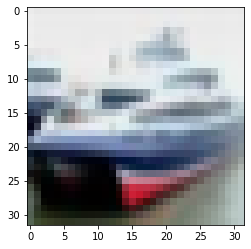

In [13]:
plt.imshow(x_test[1])

### PREDICTING

In [14]:
classes = range(0,10)

names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Zip the names and classes to make a dictionary of class_label

class_labels = dict(zip(classes,names))

# Generate batch of 9 images to predict

batch =x_test[100:109]
labels=np.argmax(Y_test[100:109],axis=-1)

# make prediction

prediction = model.predict(batch,verbose=1)

1/1 [==============================] - 0s 20ms/step


In [15]:
print(prediction)

[[6.8096595e-04 4.8027654e-05 2.7476933e-02 7.7342689e-03 1.7747964e-01
  6.5365747e-02 3.7270680e-04 7.2030979e-01 2.6063781e-04 2.7127462e-04]
 [6.0088452e-05 1.4098356e-05 1.8935434e-03 7.0939213e-02 1.9966119e-03
  9.0904170e-01 5.6848791e-03 1.0245280e-02 4.8528895e-05 7.6034943e-05]
 [4.8440612e-09 7.0041821e-08 1.7481649e-05 1.7657196e-03 4.5577908e-06
  1.3907067e-04 9.9807274e-01 2.6402870e-07 1.2401281e-08 5.4541545e-08]
 [1.7077329e-07 4.5850488e-08 2.2017884e-04 9.9168879e-01 1.3041508e-04
  5.9294989e-03 1.9456953e-03 8.1357561e-05 3.7654397e-07 3.5130561e-06]
 [1.2613397e-14 1.0000000e+00 7.2945682e-21 1.1241875e-17 1.1034345e-21
  5.1897001e-21 7.2636185e-18 2.8959696e-23 2.8526074e-14 4.8782389e-10]
 [8.7825160e-09 9.9999976e-01 1.3620452e-13 4.5501033e-11 8.3152200e-15
  4.0485784e-13 1.5007051e-11 4.3432684e-16 3.1585216e-08 2.5106553e-07]
 [1.1039136e-01 9.5811905e-04 5.2283651e-01 2.4398644e-01 4.6125418e-03
  7.3342785e-02 5.9020072e-03 1.0164973e-02 2.6835142e-02 

In [16]:
class_result=np.argmax(prediction,axis=-1)
print(class_result)

[7 5 6 3 1 1 2 6 8]


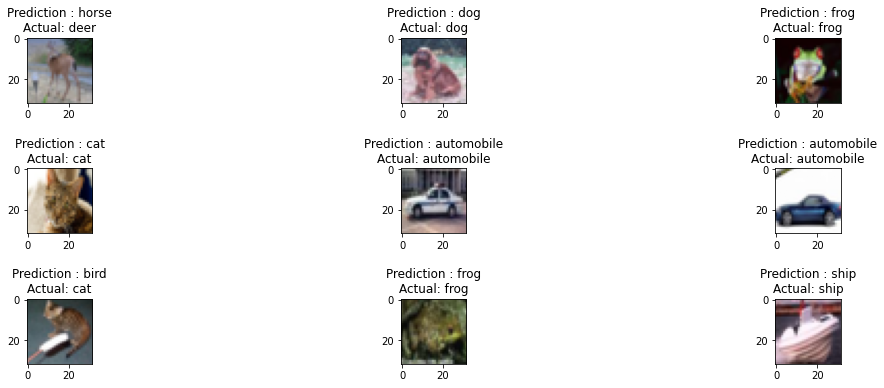

In [17]:
fig, axs=plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction : {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            
    axs[i].imshow(img)

plt.show()
            
